In [1]:
import tensorflow as tf
from tensorflow import keras

Fashion MNIST number classification load

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images_full, train_labels_full), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = train_images_full[:5000]/255, train_images_full[5000:]/255
y_valid, y_train = train_labels_full[:5000], train_labels_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [6]:
history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7246 - accuracy: 0.7598 - val_loss: 0.5039 - val_accuracy: 0.8304
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4889 - accuracy: 0.8300 - val_loss: 0.4544 - val_accuracy: 0.8476
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4422 - accuracy: 0.8460 - val_loss: 0.4217 - val_accuracy: 0.8520
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4151 - accuracy: 0.8535 - val_loss: 0.4173 - val_accuracy: 0.8576
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3956 - accuracy: 0.8616 - val_loss: 0.3744 - val_accuracy: 0.8736
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8664 - val_loss: 0.3771 - val_accuracy: 0.8716
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3653 - accuracy: 0.8719 - val_loss: 0.3705 - val_accuracy:

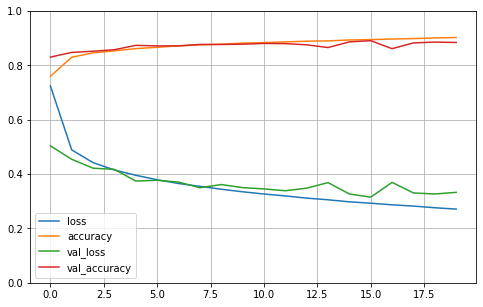

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 77.4609 - accuracy: 0.8217


[77.46085357666016, 0.8216999769210815]

Regression MLP on housing prices

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7600 - val_loss: 4.9965
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7359 - val_loss: 14.4013
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1553 - val_loss: 2.2178
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8630 - val_loss: 2.6062
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4650 - val_loss: 0.8977
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3997 - val_loss: 0.3750
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3830 - val_loss: 0.3731
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3846 - val_loss: 0.3793
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3628 - val_loss: 0.3638
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3696 - val_loss: 0.364

In [12]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(10, activation="relu")(input_B)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=output)

model.compile(loss="mse", optimizer="sgd")

In [13]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9342 - val_loss: 3.4490
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6817 - val_loss: 0.5822
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5423 - val_loss: 0.5312
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5512 - val_loss: 0.5561
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4991 - val_loss: 0.5837
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5066 - val_loss: 0.4768
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4433 - val_loss: 0.4484
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4551 - val_loss: 0.5293
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4289 - val_loss: 0.4308
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4175 - val_loss: 0.6604

In [14]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(10, activation="relu")(input_B)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [15]:
history = model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20,
                    validation_data=((X_valid_A, X_valid_B), [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0411 - dense_10_loss: 0.8899 - dense_11_loss: 2.4016 - val_loss: 0.7310 - val_dense_10_loss: 0.6606 - val_dense_11_loss: 1.3649
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5413 - dense_10_loss: 0.4742 - dense_11_loss: 1.1455 - val_loss: 0.5084 - val_dense_10_loss: 0.4483 - val_dense_11_loss: 1.0495
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4870 - dense_10_loss: 0.4361 - dense_11_loss: 0.9450 - val_loss: 0.4906 - val_dense_10_loss: 0.4434 - val_dense_11_loss: 0.9153
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4671 - dense_10_loss: 0.4264 - dense_11_loss: 0.8337 - val_loss: 0.4847 - val_dense_10_loss: 0.4468 - val_dense_11_loss: 0.8257
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4540 - dense_10_loss: 0.4207 - dense_11_loss: 0.7533 - val_loss: 0.4767 - val_dense_10_loss: 0.4454 - val_de

In [16]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3881 - dense_10_loss: 0.3675 - dense_11_loss: 0.5731


In [17]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

In [18]:
import time
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [19]:
run_logdir = get_run_logdir()

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [21]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7968 - val_loss: 13.7674
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1993 - val_loss: 152.2668
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [=======================

In [22]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape, "kernel_initializer": "he_normal"}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])